<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/Otimiza%C3%A7%C3%A3o_de_Hipermetros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação

    Notebook voltado para o estudo de tunagem de
    hiperparametros. Como é um tópico que atinge
    tanto regressão, quanto classificação,
    achei justa um notebook separado para
    abordar melhor o tema.

**Tipos de Otimização**

    Veremos aqui as otimização de
    Hiperâmetros por:

    1. GridSearch
    2. RandomSearch
    3. BayesianSeach

**Nota**

    O Bayesian Seach não tem no SKlearn, pelo menos não
    até o momento da construção desse notebook. Deste modo,
    trabalharemos com outra biblioteca, a scikit-optimize.

# Escolhendo os datasets:

    Já vimos alguns datasets, vamos estão
    trabalhar com os mesmos datasets, porem
    agora ajustando seus hiperpadametros.

In [ ]:
# Importações
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diagnostic = datasets.load_breast_cancer();diagnostic.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
pd.DataFrame(diagnostic.target).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [ ]:
diabetes = datasets.load_diabetes();diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
pd.DataFrame(diabetes.target).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB




```
  Nessa altura do campeonato, já
sabemos que classificação é um problema
de predição quando o alvo está definido
discreto e regressão é quando o alvo
está definido no contínuo. Deste modo,
já temos nossos dois datasets de estudo.
```



# Otimização de hiperparametros:

    Podemos pensar inicialmente me 3
    tipos de formas, ou métodos, de
    ajustar os hiperparâmetros.

## Preparação:

    Apenas algumas definições para o funcionamento
    adequado do modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
# Escolha do Dataset:
problema = input('Escolha o tipo de problema a ser resolvido (Regressão ou Classificação):\n')
problema = problema.lower()

if problema == 'regressão':
  X = diabetes.data
  y = diabetes.target

elif problema == 'classificação':
  X = diagnostic.data
  y = diagnostic.target

else:
  print('Não especificou o problema corretamente.')

Escolha o tipo de problema a ser resolvido (Regressão ou Classificação):
regressão


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=21)

## Grid Search

    O GridSeach nada mais é do que um
    produto cartesiano dentre todas as
    possibilidades de ajustes dos hiperâmetros.

    A primeira vista pode parecer uma boa
    escolha, afinal ele testa tudo, não?
    Porém a complexidade desse ajuste pode
    deixa-lo inviavel, de modo que é sempre
    aconselhavel outra escolha. Porém, ainda assim,
    ele é sim uma opção em alguns casos e
    pode sim dar o melhor resultado.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

# Gride de parametros:
param_grid = {"alpha":np.arange(0.0001,1,10),
              "solver":["sag","lsqr"]}

ridge = Ridge()

**Nota**


```
  Para todos os casos de otimização de
hiperparâmetros, definir-se-á um dicionário
com os hiperêmetros e suas faixas de valores
que serão testados.
```


**KFold**


```
  O KFold é uma técnica de validação
cruazada. Já vimos ele no notebook sobre
classificação com o algorítmo KNN.
```
**Ridge**


```
  Já vimos o que é Ridge no notebook
de Regressão.
```






In [ ]:
Grid_ridge_cv = GridSearchCV(ridge,param_grid,cv=kf)
Grid_ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([0.0001]), 'solver': ['sag', 'lsqr']})

In [ ]:
print(Grid_ridge_cv.best_params_,Grid_ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.5080022871440413


In [ ]:
# Avaliando o modelo no conjunto de Teste:
test_score_Grid = Grid_ridge_cv.score(X_test,y_test);test_score_Grid

0.4165790125186075

## Random Search:

    A ideia do RandomizeSearch como o proprio
    nome já diz, é otimizar por meio de uma
    busca aleatorizada. A ideia é utiliza-la
    como uma solução de complexidade menor do
    que o GridSearch.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
Random_ridge_cv = RandomizedSearchCV(ridge,param_grid,cv=kf, n_iter=2)
Random_ridge_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Ridge(), n_iter=2,
                   param_distributions={'alpha': array([0.0001]),
                                        'solver': ['sag', 'lsqr']})


**n_iter**
```
  Opcionalmente, podemos definir o argumento
"n_iter", que determina o número de valores
de hiperparâmetros testados. Portanto, a
validação cruzada de 5 vezes, com o n_iter
definidos como 2, gera 10 ajustes.
```



In [ ]:
print(Random_ridge_cv.best_params_,Random_ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.5080022871440413


In [ ]:
# Avaliando o modelo no conjunto de Teste:
test_score_Random = Random_ridge_cv.score(X_test,y_test);test_score_Random

0.4165790125186075



```
  Tanto o GridSearchCV, quanto o RandomizedSearchCV
tiveram o mesmo desemprenho, ou seja, para esse caso,
deu no mesmo, podendo se usar ambos os valores
para a hiperparametrização.
```



## Bayseian Search

    Como já dito, o sklearn não possui o Bayseian Search, de modo que
    precisaremos recorrer a outra biblioteca a scikit-optimize.A scikit-optimize
    é uma biblioteca em fase experimental, pelo menos até o momento da
    construção desse código, que é focada em optimização de hiperparâmetros.

    O Baysean Seach, como o próprio nome já diz, é uma otimização baseada
    no Paradigma Bayseano, que trata a parametro a ser estimado como uma
    variável aleatória, de modo que o parâmetro passa a ter uma distrubuição.
    Entender isso é interessante para entender como funciona a optmização
    por esse método.

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real,Categorical, Integer

In [ ]:
Bayes_ridge_cv = BayesSearchCV(ridge,param_grid,n_iter=2,cv=kf)
Bayes_ridge_cv.fit(X_train,y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Ridge(), n_iter=2,
              search_spaces={'alpha': array([0.0001]),
                             'solver': ['sag', 'lsqr']})

In [ ]:
print(Bayes_ridge_cv.best_params_,Bayes_ridge_cv.best_score_)

OrderedDict([('alpha', 0.0001), ('solver', 'lsqr')]) 0.5080022871440413


In [ ]:
# Avaliando o modelo no conjunto de Teste:
test_score_Bayes = Bayes_ridge_cv.score(X_test,y_test);test_score_Bayes

0.4165790125186075

## Testando a Regressão:

    Num dos notebooks de estudo, as métricas da regressão não ficaram
    muito boas, vamos testar aqui para ver se melhoramos a qualidade
    da regressão.

A precisão do modelo é de 42.0%
57.92176198354285


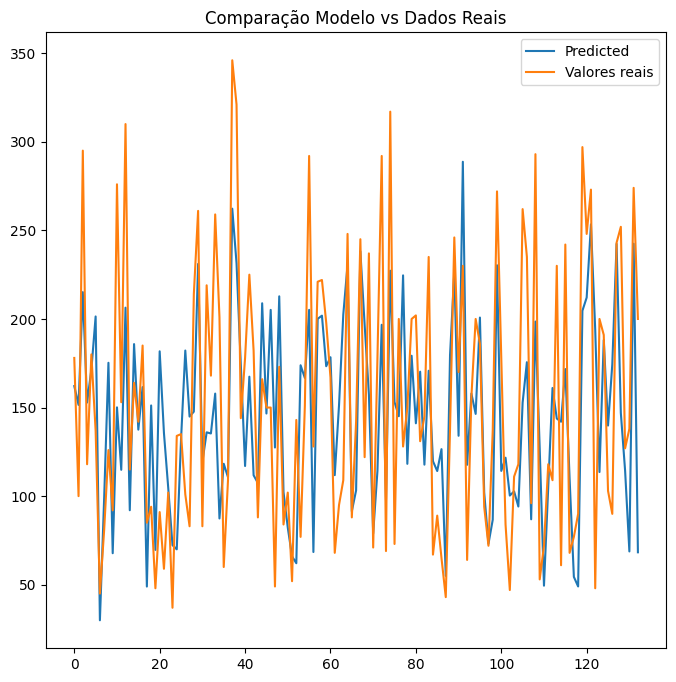

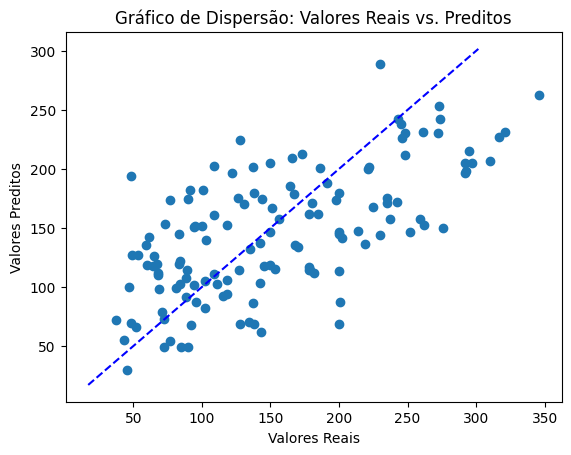

In [ ]:
if problema == "regressão":
  from sklearn.linear_model import LinearRegression
  # Construindo o modelo quanto a um objeto:
  rid = Ridge(alpha = 0.0001, solver = 'lsqr')

  # Treinando o modelo:
  rid.fit(X_train,y_train)

  # Predizendo a variável:
  y_pred = rid.predict(X_test)

  # Checando a precisão do modelo:
  acuracia = round(rid.score(X_test,y_test),2)*100 # Passando para porcentagem
  print(f'A precisão do modelo é de {acuracia}%')

  # Erro Quadrático Médio:
  from sklearn.metrics import mean_squared_error
  print(mean_squared_error(y_test, y_pred, squared=False))

  # Gráfico de
  plt.figure(figsize=(8,8))
  plt.title('Comparação Modelo vs Dados Reais')
  plt.plot(y_pred, label='Predicted')
  plt.plot(y_test, label='Valores reais')
  plt.legend()
  plt.show()


  # Comparação da qualidade do Modelo:
  plt.scatter(y_test, y_pred)
  plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim(), '--', color='blue')
  plt.xlabel('Valores Reais')
  plt.ylabel('Valores Preditos')
  plt.title('Gráfico de Dispersão: Valores Reais vs. Preditos')
  plt.show()

**Conclusão**

    Note que essa questão de Optimização de Hiperparâmetros é um tanto
    complexa, porque por vezes ela não exatamente melhora, as vezes até
    piorando as métricas.

    No caso da classificação pela Regressão Logistica eu tinha encontrado
    métricas inferiores a 60% de acurácia, porém, aumentar o número de
    interações já foi o suficiente para ajustar o modelo.

    No caso de regressão de fato melhorou significativamente, porque, sem
    a optimização dos hiperparâmetros, o score foi de 28,03%. Já com
    a optimização, seria de 42%.

    Ou seja, ajuda? Sim! Porém não faz milagre, nem é uma receita de bolo,
    cada caso é um caso, tudo precisa ser analisado e ponderado para ver se
    vale a pena. Note também que eu não me aprofundei na optmização dos
    modelos, mas sim, apenas apresentei algumas possibilidades de optimização,
    o que era o objetivo aqui.

